## Image sizing

After constructing the dataframe of attributes in question (see Data Selection notebook), it is now time to work with images directly. In this notebook I will select and copy to separate folders images of the dresses I will be working with, both low and high resolution. 

In working with images in deep learning it is essential to use the same size of the input images. I will start building models using low resolution images to save on time, therefore here I explore actual dimentions of both types of images to figure out common sizes to use for modelling.

In [4]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from time import sleep
from tqdm import tqdm

In [5]:
# load dataframe of attributes
dresses = pd.read_csv('data/dress_attributes.csv', header=0)
dresses.drop('Unnamed: 0', axis=1, inplace=True)
dresses.head()

,url,maxi,midi,mini,sleeve,sleeveless,long sleeve,bodycon,fit,flare,...,chiffon,floral lace,cotton,denim,mesh,beaded,textured,trim,pleated,sheer
0,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Right now both folder for low and high resolution images contain the photos for all clothing categories. However, I will only need selected dresses. I will move them in separate folder and label as per index in dataframe for further simlicity.

In [24]:
# select low res dress images from all images
for i in range(len(dresses)):
    url = dresses.loc[i,'url']
    ext = url.split('.')[1]
    img = Image.open('data/img/' + url)
    img = img.convert('RGB')
    img.save('data/dress_images_lr/' + str(i) + '.' + ext)
    del img

When the file is read with pyplot function imread() it is being transformed in 3D numpy array. Two first dimensions correspond to length and width and the third one to the values of three colors: red, green and blue (RGB) that build up a color image.

I will put the image shapes into a separate dataframe to be able to check for the average sizes.

In [6]:
# initiate dataframe with all zeroes
shapes = pd.DataFrame(0, index=range(len(dresses)), columns=[0,1,2])

# read each image and save its shape
for i in tqdm(range(len(dresses))):
    sleep(0.01)
    img = plt.imread('data/img/' + dresses.loc[i,'url'])
    shapes.loc[i,:]=list(img.shape)
    del img

100%|██████████| 61414/61414 [16:34<00:00, 61.75it/s]


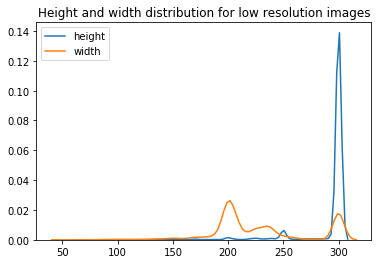

In [7]:
# build kde plot for height and width
ax = plt.subplot()
sns.kdeplot(data=shapes.loc[:,0],ax=ax, label='height')
sns.kdeplot(data=shapes.loc[:,1], ax=ax, label='width')
plt.title('Height and width distribution for low resolution images')
plt.show()

Looks like a large number of low resolution images are about 300 pixels high. The variation it width is larger. As it was shown in Data_Selection notebook, most images have a portrait orientation (which seems logical for dress images). The graph above shows picks at 200 pixels for width and I think the size of 300x200 pixels can be a good start.

Let's now load high res images and perform similar size analysis.

In [14]:
# select high res dress images from all images
for i in range(len(dresses)):
    url = dresses.loc[i,'url']
    ext = url.split('.')[1]
    img = Image.open(url)
    img = img.convert('RGB')
    img.save('data/dress_images_hr/' + str(i) + '.' + ext)
    del img




  1%|          | 748/61414 [00:40<29:34, 34.19it/s]C:\Users\ksushka\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8552 bytes but only got 8356. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag))


In [6]:
# create array of shapes for high res images
Image.MAX_IMAGE_PIXELS = None
shapes_hr = pd.DataFrame(0, index=range(len(dresses)), columns=[0,1,2])
for i in range(len(dresses)):
    img = plt.imread('data/dress_images_hr/' + str(i)+'.jpg')
    shapes_hr.loc[i,:]=list(img.shape)
    del img


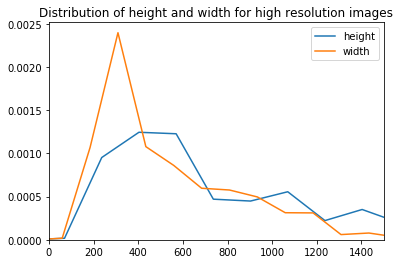

In [10]:
# plot distribution of high resolution images height and width
ax = plt.subplot()
sns.kdeplot(data=shapes_hr.loc[:,0],ax=ax, label='height')
sns.kdeplot(data=shapes_hr.loc[:,1], ax=ax, label='width')
plt.xlim([0,1500])
plt.title('Distribution of height and width for high resolution images')
plt.show()

Interestingly, the peaks of the high resolution image sizes are on the lower ends of the size variations, as opposed to low resolution images, where the peaks were on the higher end.

Also in case of high resolution images the width choice is more obvious than for the height. In this case I will use  300 for width and 450 (which is in proportion to 300x200 low resolution selection) for height. This will be the next size to try for deep learning model. In case it does not provide good outcomes, I will increase the size proportionally.